<a href="https://colab.research.google.com/github/jenish2/032_Jenish_Dholariya/blob/main/Lab_03_Digits_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Importing needful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

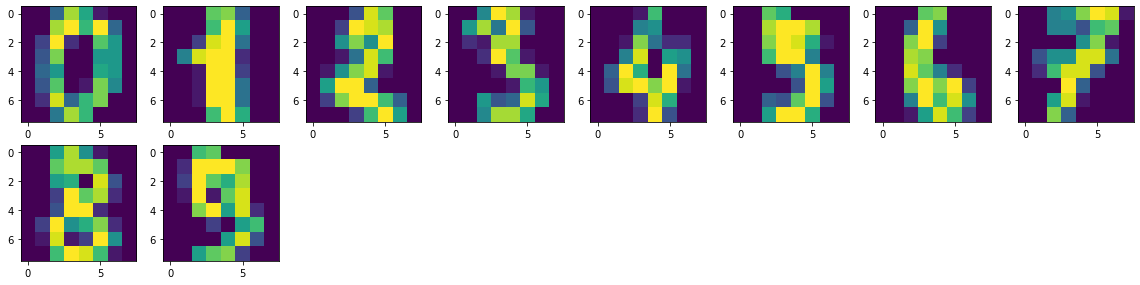

In [4]:
# Loading digits dataset from sklearn

main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

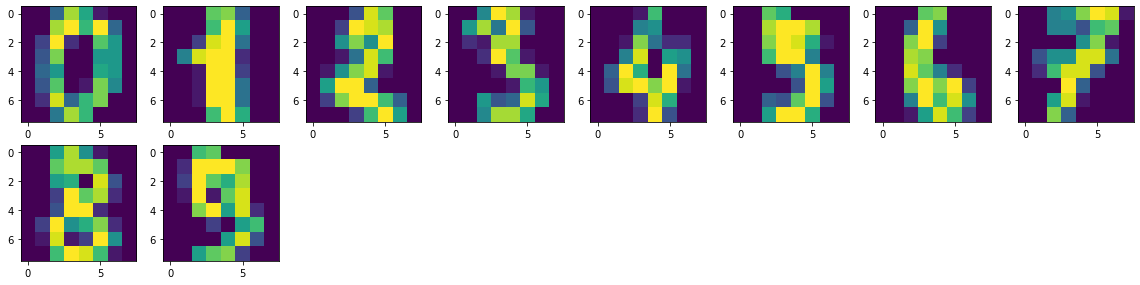

In [5]:
# Loading digits dataset from sklearn

main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 32)

In [7]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")


Accuracy :- 0.8222222222222222


In [8]:
main_data.images[3]


array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

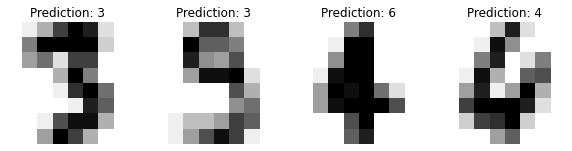

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')


In [10]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")


Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.90      0.72      0.80        36
           2       1.00      0.50      0.67        32
           3       0.78      0.88      0.82        56
           4       1.00      0.81      0.89        31
           5       0.87      0.92      0.89        36
           6       0.92      1.00      0.96        34
           7       0.74      1.00      0.85        34
           8       0.51      0.81      0.63        27
           9       0.78      0.58      0.67        36

    accuracy                           0.82       360
   macro avg       0.85      0.82      0.82       360
weighted avg       0.85      0.82      0.82       360




Confusion matrix:
[[36  0  0  0  0  2  0  0  0  0]
 [ 0 26  0  0  0  0  1  2  2  5]
 [ 0  1 16  3  0  0  0  0 12  0]
 [ 0  0  0 49  0  1  0  1  4  1]
 [ 0  0  0  0 25  1  2  1  2  0]
 [ 0  0  0  1  0 33  0  2  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  1  0  2 22  0]
 [ 0  0  0 10  0  0  0  4  1 21]]


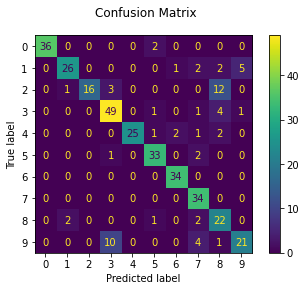

In [11]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()